# Example of Monte Carlo with Ito Integral

Consider the following Ito integral:

$$ X(T) = \int_0^T u^2 dW(u) $$

Define $T = 1$ and compute the expectation and variance:

$$ \mathbb{E}[X(T=1)] = \mathbb{E}\left[\int_0^1 u^2 dW(u)\right] = 0$$

$$ \mathbb{V}\text{ar}[X(T=1)] = \int_0^1 t^4 dt = 0.2$$

Now we replicate the analytical result with a Monte Carlo simulation. Define $g(t) = t^2$ and use the following discretisation scheme:

$$ x_{i+1,j} = x_{i,j} + g(t_i) (W(t_{i+1,j}) - W(t_{i,j})), \quad j=1,\dots,N $$

where 

$$ W(t_{i+1,j}) - W(t_{i,j}) = Z\sqrt{\Delta t}, \quad Z \sim \mathcal{N}(0, 1) $$

$$ x_{i+1,j} = x_{i,j} + g(t_i) Z\sqrt{\Delta t} $$

For example, for the first time step for a given path,

$$ x_1 = x_0 + g(t_0) Z\sqrt{\Delta t} $$

In [50]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
dt = 0.01  # time increment
T = 1
t_array = np.arange(0, T+dt, dt)

N = 10000  # number of simulated paths

def g(x):
    return x**2

paths = []

for n in range(N):
    x_path = [0]
    
    for t in t_array[:-1]:
        x_next = x_path[-1] + g(t) * np.random.normal(0, 1) * np.sqrt(dt)
        x_path.append(x_next)
    
    paths.append(x_path)
    
paths = np.array(paths)

Text(0, 0.5, 'X(t)')

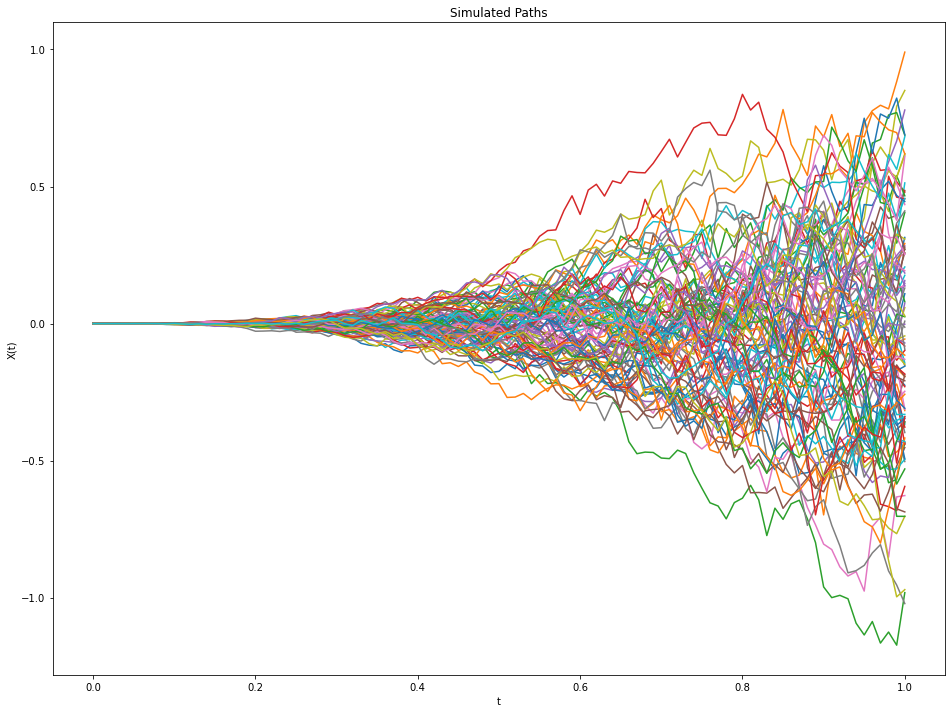

In [42]:
# Plot the first 100 paths
plt.figure(figsize=(16, 12))

for i in range(100):
    plt.plot(t_array, paths[i, :])
    
plt.title('Simulated Paths')
plt.xlabel('t')
plt.ylabel('X(t)')

(array([  1.,   0.,   3.,   2.,   4.,   7.,   9.,  20.,  25.,  36.,  65.,
         72., 117., 128., 169., 235., 264., 326., 375., 438., 539., 534.,
        563., 634., 570., 585., 557., 550., 519., 479., 414., 389., 329.,
        260., 187., 164., 112., 100.,  63.,  57.,  36.,  19.,  16.,  15.,
          6.,   2.,   1.,   1.,   2.,   1.]),
 array([-1.6816388 , -1.61373519, -1.54583157, -1.47792795, -1.41002434,
        -1.34212072, -1.2742171 , -1.20631349, -1.13840987, -1.07050625,
        -1.00260264, -0.93469902, -0.86679541, -0.79889179, -0.73098817,
        -0.66308456, -0.59518094, -0.52727732, -0.45937371, -0.39147009,
        -0.32356647, -0.25566286, -0.18775924, -0.11985563, -0.05195201,
         0.01595161,  0.08385522,  0.15175884,  0.21966246,  0.28756607,
         0.35546969,  0.42337331,  0.49127692,  0.55918054,  0.62708416,
         0.69498777,  0.76289139,  0.830795  ,  0.89869862,  0.96660224,
         1.03450585,  1.10240947,  1.17031309,  1.2382167 ,  1.30612032,
 

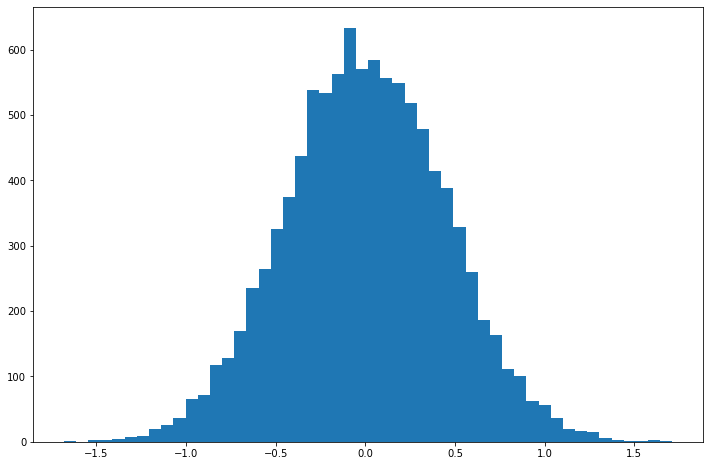

In [52]:
plt.figure(figsize=(12, 8))
plt.hist(paths[:, -1], bins=50)

To obtain the estimate:

$$ \mathbb{E}[X(T)] \approx \bar{X}_N(T) = \frac{1}{N} \sum_{j=1}^N X_j(T) $$

And the sample variance is:

$$ \bar{\nu}_N^2 = \frac{1}{N-1} \sum_{j=1}^N (X_j(T) - \bar{X}_N(T))^2 $$

and the standard error is:

$$ \epsilon_N = \frac{\bar{\nu}_N}{\sqrt{N}} $$

In [43]:
# Sample mean
mean = 1 / N * np.sum(paths[:, -1])
mean

0.0038666124005041326

In [44]:
# Sample variance
v2 = 1 / (N - 1) * np.sum((paths[:, -1] - mean)**2)
v2

0.1973751106760679

In [45]:
# Standard error
se = np.sqrt(v2 / N)
se

0.0044426918717830055

# Smoothness

Monte Carlo convergence strongly depends on the smoothness of the function of interest. Consider the following non-smooth and smooth functions (respectively):

$$ g_1(x) = \mathbb{1}_{x\geq 0}, \quad g_2(x) = F_{\mathcal{N}(0,1)}(x) $$

Setting $x = W(T=1)$, $\mathbb{E}[g_i(W(1)) | \mathcal{F}(t_0)]$ for $i=1,2$, both expectations are $\frac{1}{2}$.

In [78]:
from scipy.stats import norm
from tqdm.notebook import tqdm

def g1(x):
    if x >= 0:
        return 1
    return 0

def g2(x):
    return norm.cdf(x)

T = 1
dt = 0.01
t_array = np.arange(0, T+dt, dt)

x0 = 0

n_paths = np.arange(100, 10100, 100)

g1_estimates, g2_estimates = [], []

for N in tqdm(n_paths):
    g1_list, g2_list = [], []
    
    for n in range(N):
        g1_list.append(g1(np.random.normal(0, 1)))
        g2_list.append(g2(np.random.normal(0, 1)))
    
    g1_mean = np.mean(g1_list)
    g2_mean = np.mean(g2_list)
    
    g1_estimates.append(g1_mean)
    g2_estimates.append(g2_mean)

g1_estimates = np.array(g1_estimates)
g2_estimates = np.array(g2_estimates)

g1_errors = g1_estimates - 0.5
g2_errors = g2_estimates - 0.5

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Error')

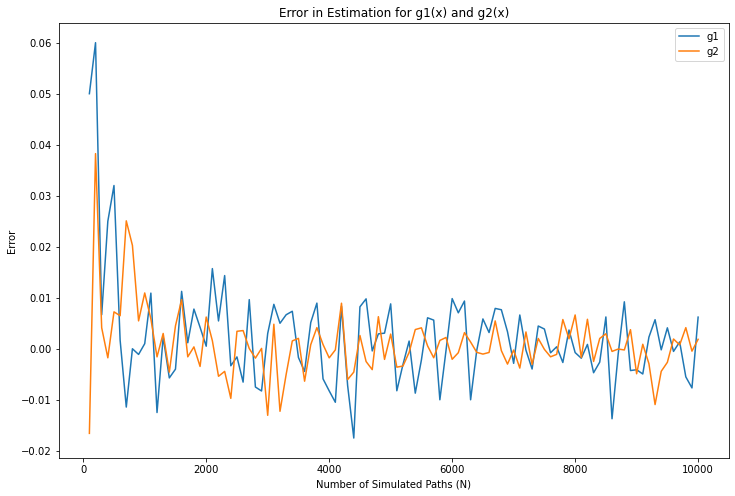

In [79]:
plt.figure(figsize=(12, 8))
plt.plot(n_paths, g1_errors)
plt.plot(n_paths, g2_errors)
plt.legend(['g1', 'g2'])
plt.title('Error in Estimation for g1(x) and g2(x)')
plt.xlabel('Number of Simulated Paths (N)')
plt.ylabel('Error')

# Geometric Brownian Motion

$$ s_{i+1, j} \approx s_{i,j} + rs_{i,j}\Delta t + \sigma s_{i,j} (W_{i+1,j} - W_{i, j}) = s_{i,j} + rs_{i,j}\Delta t + \sigma s_{i,j} \sqrt{\Delta t}Z $$

where $Z \sim \mathcal{N}(0, 1)$. The GBM process with dynamics $dS(t) = rS(t)dt + \sigma S(t)dW(t)$ has an exact solution in the time interval $[t_i, t_{i+1}]$:

$$ S(t_{i+1}) = S(t_i) \exp \left( \left(r - \frac{1}{2}\sigma^2\right)\Delta t + \sigma (W(t_{i+1}) - W(t_i)) \right)$$

In [94]:
S0 = 50
r = 0.06
sigma = 0.3
T = 1

n_paths = 25
n_steps = 25

Z = np.random.normal(0, 1, [n_paths, n_steps])
W = np.zeros([n_paths, n_steps+1])

S_mc = W.copy()
S_mc[:, 0] = S0
S_exact = S_mc.copy()

time = np.zeros([n_steps+1])
dt = T / n_steps

for i in range(n_steps):
    
    W[:, i+1] = W[:, i] + np.sqrt(dt) * Z[:, i]
    
    # Monte Carlo approximation
    S_mc[:, i+1] = S_mc[:, i] + r * S_mc[:, i] * dt + sigma * S_mc[:, i] * (W[:, i+1] - W[:, i])
    
    # Exact solution
    S_exact[:, i+1] = S_exact[:, i] * np.exp((r - 0.5 * sigma**2) * dt + sigma * (W[:, i+1] - W[:, i]))
    
    time[i+1] = time[i] + dt

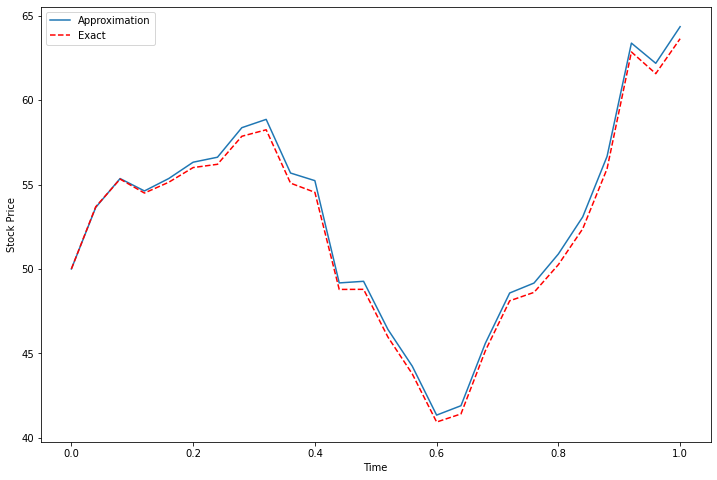

In [95]:
plt.figure(figsize=(12, 8))
plt.plot(time, S_mc[0, :])
plt.plot(time, S_exact[0, :], linestyle='dashed', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(['Approximation', 'Exact'])

In [98]:
# Calculate strong convergence error
strong_error = 1 /  n_paths * np.sum(np.abs(S_exact[:, -1] - S_mc[:, -1]))
strong_error

0.5914297570293375

In [99]:
# Weak convergence error
weak_error = np.abs(1 / n_paths * np.sum(S_exact[:, -1]) - 1 / n_paths * np.sum(S_mc[:, -1]))
weak_error

0.16993758197379094

In [137]:
# Try for different increment sizes to see impact on error
S0 = 50
r = 0.06
sigma = 0.3
T = 1

n_paths = 10000
n_steps_list = np.arange(1, 201, 1)

strong_errors, weak_errors = [], []

for n_steps in n_steps_list:
    dt = T / n_steps
    Z = np.random.normal(0, 1, [n_paths, n_steps])
    W = np.zeros([n_paths, n_steps+1])
    time = np.zeros([n_steps+1])
    S_mc = np.zeros([n_paths, n_steps+1])
    S_mc[:, 0] = S0
    S_exact = S_mc.copy()

    for i in range(n_steps):

        W[:, i+1] = W[:, i] + np.sqrt(dt) * Z[:, i]

        # Monte Carlo approximation
        S_mc[:, i+1] = S_mc[:, i] + r * S_mc[:, i] * dt + sigma * S_mc[:, i] * (W[:, i+1] - W[:, i])

        # Exact solution
        S_exact[:, i+1] = S_exact[:, i] * np.exp((r - 0.5 * sigma**2) * dt + sigma * (W[:, i+1] - W[:, i]))

        time[i+1] = time[i] + dt
    
    strong_errors.append(np.mean(np.abs(S_exact[:, -1] - S_mc[:, -1])))
    weak_errors.append(np.abs(np.mean(S_exact[:, -1]) - np.mean(S_mc[:, -1])))

strong_errors.append(0)
weak_errors.append(0)

Text(0, 0.5, 'Error')

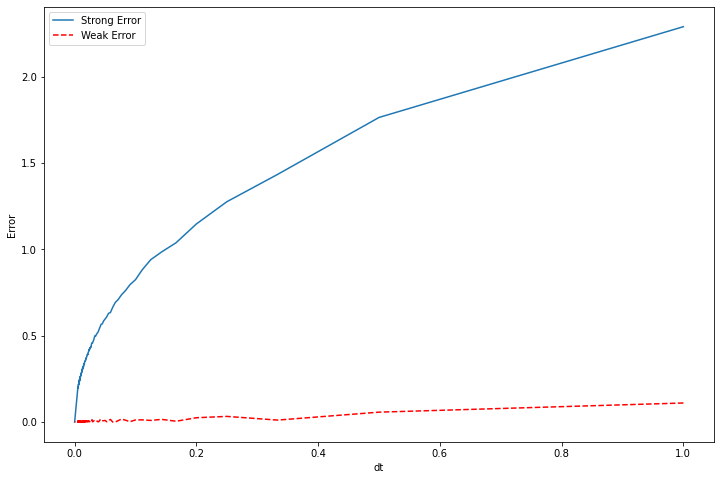

In [138]:
dt_list = T / n_steps_list
dt_list = np.hstack([dt_list, [0]])

plt.figure(figsize=(12, 8))
plt.plot(dt_list, strong_errors)
plt.plot(dt_list, weak_errors, linestyle='dashed', color='red')
plt.legend(['Strong Error', 'Weak Error'])
plt.xlabel('dt')
plt.ylabel('Error')

Milstein scheme increases the speed of convergence by adding a third term to the discretisation scheme:

$$
\begin{align}
x_{i+1} &= x_i + \int_{t_i}^{t_{i+1}} \bar{\mu}(t, X(t))dt +  \int_{t_i}^{t_{i+1}} \bar{\sigma}(t,X(t))dW(t)\\
&\approx x_i + \int_{t_i}^{t_{i+1}} \bar{\mu}(t_i, x_i)dt +  \int_{t_i}^{t_{i+1}} \bar{\sigma}(t_i,x_i)dW(t) + \frac{1}{2}\bar{\sigma}(t_i, x_i) (W^2(\Delta t) - \Delta t) \frac{\partial \bar{\sigma}}{\partial x}(t_i, x_i)
\end{align}
$$

Therefore,

$$
s_{i+1} \approx s_i + rs_i \Delta t + \sigma s_i (W(t_{i+1}) - W(t_i)) + \frac{1}{2}\sigma^2 s_i \left( (W(t_{i+1}) - W(t_i))^2 - \Delta t \right)
$$

$$ = s_i + rs_i\Delta t + \sigma s_i \sqrt{\Delta t}Z + \frac{1}{2}\sigma^2 s_i(\Delta t Z^2 - \Delta t) $$

In [139]:
S0 = 50
r = 0.06
sigma = 0.3
T = 1

n_paths = 10000
n_steps_list = np.arange(1, 201, 1)

strong_errors, weak_errors = [], []

for n_steps in n_steps_list:
    dt = T / n_steps
    Z = np.random.normal(0, 1, [n_paths, n_steps])
    W = np.zeros([n_paths, n_steps+1])
    time = np.zeros([n_steps+1])
    S_mc = np.zeros([n_paths, n_steps+1])
    S_mc[:, 0] = S0
    S_exact = S_mc.copy()

    for i in range(n_steps):

        W[:, i+1] = W[:, i] + np.sqrt(dt) * Z[:, i]

        # Monte Carlo approximation
        S_mc[:, i+1] = S_mc[:, i] + r * S_mc[:, i] * dt + sigma * S_mc[:, i] * (W[:, i+1] - W[:, i]) +\
                        0.5 * sigma**2 * S_mc[:, i] * ((W[:, i+1] - W[:, i])**2 - dt) 

        # Exact solution
        S_exact[:, i+1] = S_exact[:, i] * np.exp((r - 0.5 * sigma**2) * dt + sigma * (W[:, i+1] - W[:, i]))

        time[i+1] = time[i] + dt
    
    strong_errors.append(np.mean(np.abs(S_exact[:, -1] - S_mc[:, -1])))
    weak_errors.append(np.abs(np.mean(S_exact[:, -1]) - np.mean(S_mc[:, -1])))

strong_errors.append(0)
weak_errors.append(0)

Text(0, 0.5, 'Error')

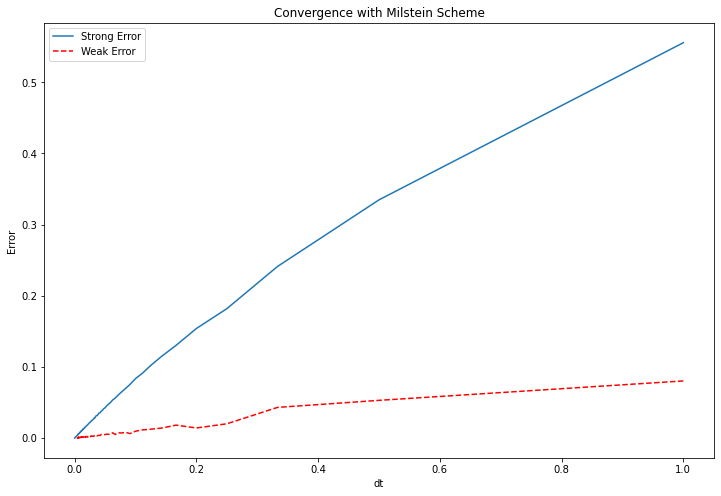

In [140]:
dt_list = T / n_steps_list
dt_list = np.hstack([dt_list, [0]])

plt.figure(figsize=(12, 8))
plt.plot(dt_list, strong_errors)
plt.plot(dt_list, weak_errors, linestyle='dashed', color='red')
plt.title('Convergence with Milstein Scheme')
plt.legend(['Strong Error', 'Weak Error'])
plt.xlabel('dt')
plt.ylabel('Error')

# Black Scholes: Monte Carlo vs. Analytic Solution

In [165]:
S0 = 5
K = 5
sigma = 0.3
r = 0.06
T = 1

n_paths = 10000
n_steps = 1000

Z = np.random.normal(0, 1, [n_paths, n_steps])
W = np.zeros([n_paths, n_steps+1])

S = W.copy()
S[:, 0] = S0

time = np.zeros([n_steps+1])
dt = T / n_steps

for i in range(n_steps):
    
    W[:, i+1] = W[:, i] + np.sqrt(dt) * Z[:, i]
    
    # Monte Carlo approximation
    S[:, i+1] = S[:, i] + r * S[:, i] * dt + sigma * S[:, i] * (W[:, i+1] - W[:, i])
    
    time[i+1] = time[i] + dt

In [166]:
payoffs = []

for i in range(S.shape[0]):
    payoffs.append(max(S[i, -1] - K, 0))
    
call_estimate = np.exp(-r * T) * np.mean(payoffs)
call_estimate

0.7394952533085188

In [167]:
class BlackScholesPricer:
    def __init__(self, S0, r, sigma, T, K):
        self.S0, self.r, self.sigma, self.T, self.K = S0, r, sigma, T, K
        self.d1 = self.calc_d1()
        self.d2 = self.d1 - self.sigma * np.sqrt(self.T)
        self.call_price = self.calc_call_price()
        self.put_price = self.calc_put_price()
        self.call_delta = self.calc_call_delta()
        self.put_delta = self.calc_put_delta()
        
    def calc_d1(self):
        num = np.log(self.S0 / self.K) + (self.r + 0.5 * self.sigma**2) * (self.T)
        denom = self.sigma * np.sqrt(self.T)
        return num / denom
    
    def calc_call_price(self):
        return self.S0 * norm.cdf(self.d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(self.d2)
    
    def calc_put_price(self):
        return self.K * np.exp(-self.r * self.T) * norm.cdf(-self.d2) - self.S0 * norm.cdf(-self.d1)
    
    def calc_call_delta(self):
        return norm.cdf(self.d1)
    
    def calc_put_delta(self):
        return norm.cdf(self.d1) - 1
    
    
BlackScholesPricer(S0, r, sigma, T, K).call_price  # close to analytic solution

0.7358536210144648